Python Version: 3.12.4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [6]:
df3 = pd.read_csv("../DATA/cville monthly precip total v2.csv")
df3.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,1893,M,M,M,3.54,M,M,M,M,M,M,M,M,M
1,1894,M,M,M,M,M,M,M,M,M,M,M,M,M
2,1895,M,M,M,M,M,M,M,M,M,M,M,M,M
3,1896,M,M,M,M,M,M,M,M,M,0.25,M,T,M
4,1897,M,M,M,M,M,M,M,M,M,M,M,M,M


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

/var/folders/2l/s3vqb85160392xx56h4d2m0c0000gn/T/ipykernel_36560/3947167159.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['variable'])


ADF Statistic: -10.948823843427515
p-value: 8.904555981079568e-20


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                 1381
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3056.552
Date:                            Wed, 23 Oct 2024   AIC                           6123.104
Time:                                    12:57:43   BIC                           6149.209
Sample:                                         0   HQIC                          6132.874
                                           - 1381                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0841      0.027      3.094      0.002       0.031       0.137
ma.L1         -0.9886      0.005   

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/2l/s3vqb85160392xx56h4d2m0c0000gn/T/ipykernel_36560/3947167159.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


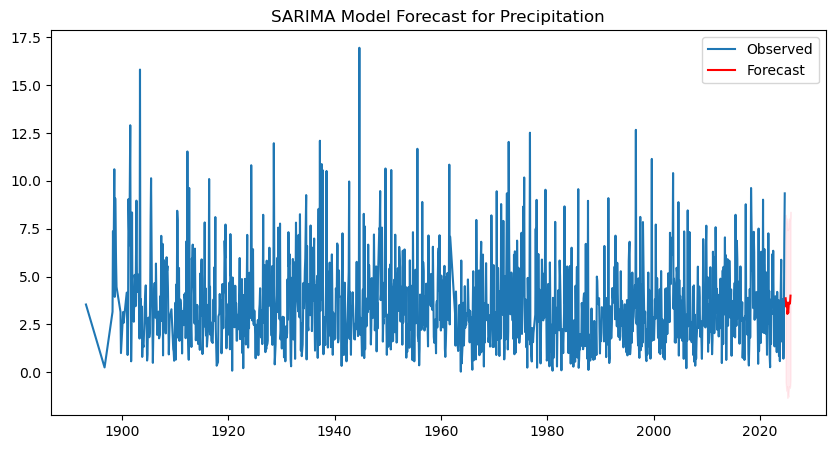

In [17]:
df = df3
df = pd.melt(df, id_vars=['Year'], value_vars=['January','February','March','April','May','June','July','August','September','October','November','December'])

df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['variable'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Drop the 'Year' and 'variable' columns if needed
df.drop(['Year', 'variable'], axis=1, inplace=True)

df = df.sort_index()

# Drop missing values
df = df.dropna()

# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df['value'])  # Replace 'October' with your preferred column
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Apply SARIMA Model
model = SARIMAX(df['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Summary of the model
print(sarima_fit.summary())

# Forecast the next 12 months
forecast = sarima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title("SARIMA Model Forecast for Precipitation")
plt.legend()
plt.show()

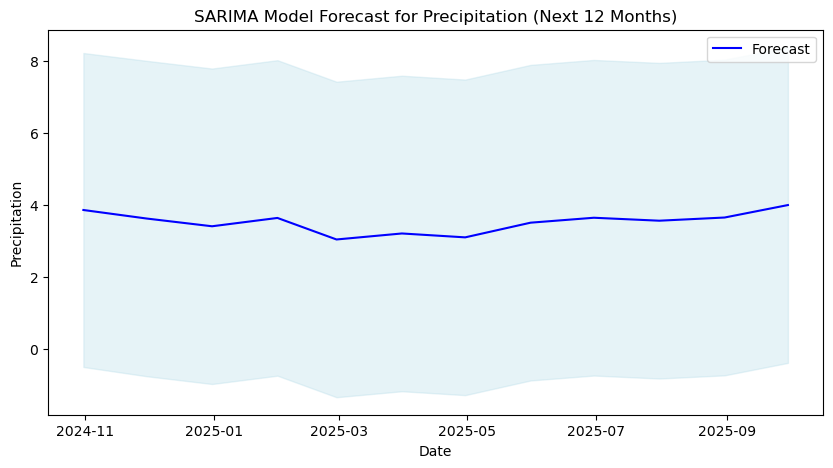

In [18]:
# Plot only the forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_index, forecast_values, label='Forecast', color='blue')

# Optionally, you can fill the confidence intervals for a clearer visualization
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], 
                 color='lightblue', alpha=0.3)

# Customize the plot
plt.title("SARIMA Model Forecast for Precipitation (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend()
plt.show()

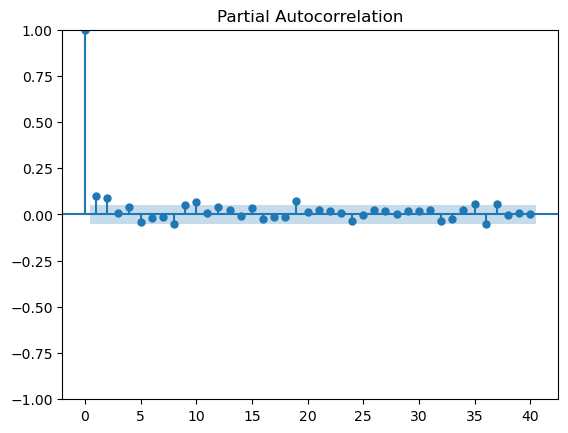

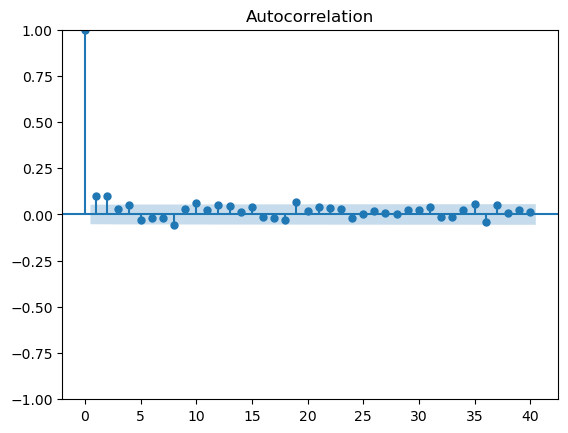

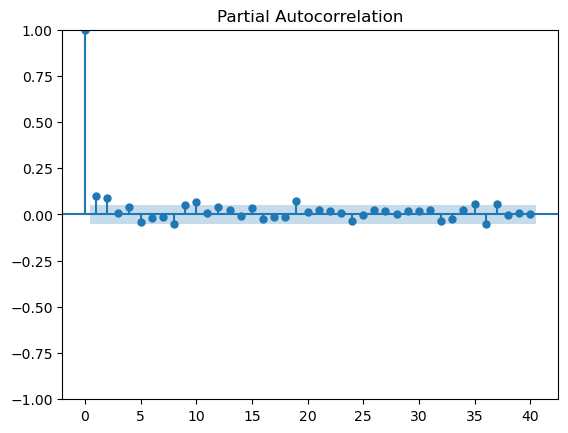

In [19]:
plot_acf(df['value'], lags=40)
plot_pacf(df['value'], lags=40)